In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data1.xlsx to data1.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['data1.xlsx']))

In [ ]:
df.head()

,obs
0,20.710038
1,20.035838
2,18.924596
3,16.312833
4,12.170810


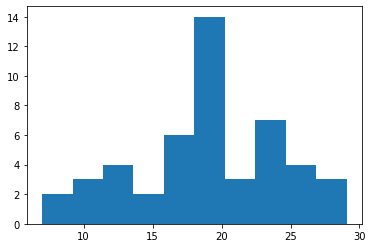

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
df.describe()

,obs
count,48.000000
mean,19.006886
std,5.392988
min,6.995103
25%,16.198008
50%,19.359880
75%,23.335490
max,29.061675


In [ ]:
stats_labels = ['Mean Observed', 'Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].mean(), 2), round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Kurt Observed', -0.31), ('Variance Observed', 29.08), ('Skew Observed', -0.29), ('Mean Observed', 19.01)}


In [ ]:
df.median()

obs    19.35988
dtype: float64

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


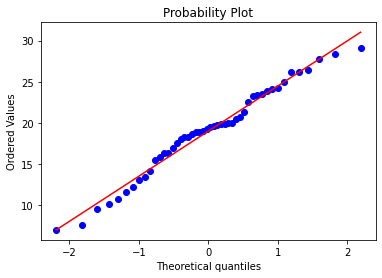

In [ ]:
stats.probplot(df['obs'], plot=plt)
plt.show()

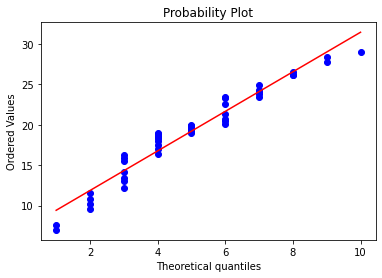

In [ ]:
stats.probplot(df['obs'], dist='poisson', sparams=(4.940000,), plot=plt)
plt.show()

In [ ]:
df.head()

,obs
0,20.710038
1,20.035838
2,18.924596
3,16.312833
4,12.170810


In [ ]:
df['obs'].value_counts(bins=6, sort=False)

(6.9719999999999995, 10.673]     4
(10.673, 14.351]                 6
(14.351, 18.028]                 7
(18.028, 21.706]                17
(21.706, 25.384]                 8
(25.384, 29.062]                 6
Name: obs, dtype: int64

In [ ]:
grouped_df = pd.DataFrame()

In [ ]:
grouped_df['frequency'] = df.groupby(pd.cut(df['obs'], bins=6)).size()
grouped_df

,frequency
obs,
"(6.973, 10.673]",4
"(10.673, 14.351]",6
"(14.351, 18.028]",7
"(18.028, 21.706]",17
"(21.706, 25.384]",8
"(25.384, 29.062]",6


In [ ]:
len(df)

48

In [ ]:
grouped_df['OBS_PROBA'] = grouped_df['frequency']/len(df)
print(grouped_df)

                  frequency  OBS_PROBA
obs                                   
(6.973, 10.673]           4   0.083333
(10.673, 14.351]          6   0.125000
(14.351, 18.028]          7   0.145833
(18.028, 21.706]         17   0.354167
(21.706, 25.384]          8   0.166667
(25.384, 29.062]          6   0.125000


In [ ]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import chisquare

In [ ]:
norm.pdf

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.norm_gen object at 0x7f6da7ef4890>>

In [ ]:
grouped_df.index

CategoricalIndex([ (6.973, 10.673], (10.673, 14.351], (14.351, 18.028],
                  (18.028, 21.706], (21.706, 25.384], (25.384, 29.062]],
                 categories=[(6.973, 10.673], (10.673, 14.351], (14.351, 18.028], (18.028, 21.706], (21.706, 25.384], (25.384, 29.062]], ordered=True, dtype='category', name='obs')

In [ ]:
df['obs'].mean()

19.006885772625

In [ ]:
grouped_df['NORMAL_PDF'] = norm.pdf(k=grouped_df.index, mu=df['obs'].mean(),sd = df['obs'].std())

TypeError: ignored

In [ ]:
grouped_df['exp_frq'] = 8
grouped_df

,frequency,exp_frq
obs,,
"(6.973, 10.673]",4,8
"(10.673, 14.351]",6,8
"(14.351, 18.028]",7,8
"(18.028, 21.706]",17,8
"(21.706, 25.384]",8,8
"(25.384, 29.062]",6,8


In [ ]:
from scipy.stats import norm
from scipy.stats import chisquare

In [ ]:
obs_freq = list(grouped_df['frequency'])
expec_freq = list(grouped_df['exp_frq'])

In [ ]:
stats.chisquare(obs_freq, expec_freq)

Power_divergenceResult(statistic=13.25, pvalue=0.021145305702514165)